In [1]:
from matplotlib import pyplot as plt
import sys

sys.path.append('../..')

from heat_load_calc.initializer import solar_shading

In [2]:
plt.style.use('seaborn-whitegrid')

# 無限に長い庇による天空日射の遮へい効果の計算

<div style="text-align: right;">佐藤エネルギーリサーチ（株）</div>

## はじめに

無限に長い庇について、天空日射に対する遮へい効果の計算法について述べる。

## 各部寸法

窓、庇共に無限に長いと仮定し、下図のような寸法が与えられるとする。

<img src="fig/solar_shading.png" width=20%>

<div style="text-align: center;">図 1　無限に長い庇の寸法</div>

## 形態係数の計算方法

窓、庇が無限に続くと仮定したため、2次元で扱えばよい。クロス・ストリング法を適用すると、窓から庇を見る形態係数は下式となる。

$$
\begin{eqnarray*}
\varphi &=& \frac{ ( AC + BD ) - ( AD + BC ) }{ 2 DC } \\
   &=& \frac{ ( ( y_1 + y_w ) + \sqrt{ y_1^2 + z^2 } )- ( y_1 + \sqrt{ ( y_1 + y_w )^2 + z^2  } ) }{ 2 y_w }
\end{eqnarray*}
$$

ここで、

$\varphi$：	窓から庇を見る形態係数 -

## 無限に長い庇があるときの窓の天空透過日射熱取得

無限に長い庇があるときの窓の天空透過日射熱取得は下式となる。

$$ Q_{GT,d} = A \cdot ( 1 - \varphi ) \cdot \tau_N \cdot c \cdot I_d $$

ここで、  
$Q_{GT,d}$：天空透過日射熱取得, W
$A$：窓面積, m<sup>2</sup>  
$\tau_N$：窓の垂直入射時透過率, -  
$c$：窓の拡散光に対する入射角特性  
$I_d$：窓に入射する天空日射, W/m<sup>2</sup>

## Example

In [3]:
def get_f_ss_s(depth, d_h, d_e):
    sss = solar_shading.SolarShadingSimple(w_alpha=0.0, depth=depth, d_h=d_h, d_e=d_e)
    return sss.get_f_ss_s_j_ns()

計算例  
- 方角 0度
- 庇の深さ 0.6m
- 窓の高さ 1.8m
- 窓上端から庇の付け根までの長さ 0.0m

In [4]:
get_f_ss_s(depth=0.6, d_h=1.8, d_e=0.0)

0.13962038997193676

庇の長さを0.0mから3.0mまで0.1m刻みで振る

In [5]:
zs = [float(x) / 10.0 for x in range(0, 31)]

In [6]:
fai1 = [get_f_ss_s(depth=z, d_h=0.6, d_e=0.0) for z in zs]

In [7]:
fai2 = [get_f_ss_s(depth=z, d_h=1.2, d_e=0.0) for z in zs]

In [8]:
fai3 = [get_f_ss_s(depth=z, d_h=2.0, d_e=0.0) for z in zs]

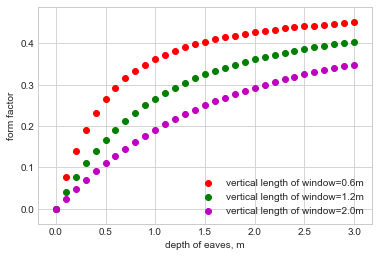

In [9]:
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.scatter(zs, fai1, c="r", label="vertical length of window=0.6m")
ax1.scatter(zs, fai2, c="g", label="vertical length of window=1.2m")
ax1.scatter(zs, fai3, c="m", label="vertical length of window=2.0m")

ax1.set_xlabel('depth of eaves, m')
ax1.set_ylabel('form factor')

plt.legend()
plt.show()